# Spectral Clustering
*Complete and hand in this completed worksheet (including its outputs and any supporting code outside of the worksheet) with your assignment submission. Please check the pdf file for more details.*

In this exercise you will:
    
- implement the **KNN graph** and other necessary algorithms for **spectral clustering**
- play with the **threshold** of spectral clustering
- apply spectral clustering on toy data and **real world data**, and compare it with k-means

Please note that **YOU CANNOT USE ANY MACHINE LEARNING PACKAGE SUCH AS SKLEARN** for any homework, unless you are asked to.

In [1]:
# some basic imports
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt
import math
from cluster_plot import cluster_plot

%matplotlib inline

%load_ext autoreload
%autoreload 2

## Experiment Spectral Clustering on synthesis data

In [2]:
cluster_data = sio.loadmat('cluster_data.mat')
X = cluster_data['X']

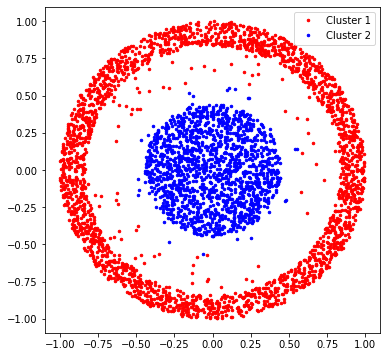

In [46]:
# Uncomment following two line and choose proper parameters
k_in_knn_graph = 300
threshold = 0.5
# begin answer
# end answer

# implement knn_graph in knn_graph.py
from knn_graph import knn_graph

W = knn_graph(X, k_in_knn_graph, threshold)

# implement spectral in spectral
from spectral import spectral

idx = spectral(W, 2)
cluster_plot(X, idx)

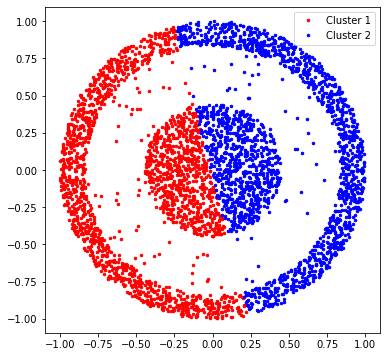

In [11]:
from kmeans import kmeans

idx = kmeans(X, 2)
cluster_plot(X, idx)

## Let's try Spectral Clustering on real-world data!

In [7]:
from spectral import spectral
from kmeans import kmeans
TDT2_data = sio.loadmat('TDT2_data.mat')
fea = TDT2_data['fea']
gnd = TDT2_data['gnd'].reshape(-1)

In [8]:
print(gnd.shape)
print(np.unique(gnd).shape[0])

(1319,)
5


In [9]:
fea = fea.toarray()
# fea = (fea - np.mean(fea, axis=0)) / np.std(fea, axis=0)
# print(np.mean(fea), np.std(fea))

In [10]:
from constructW import constructW
from bestMap import bestMap
from MutualInfo import MutualInfo
# YOUR CODE HERE
# begin answer
epoch = 20
temp_sc_accu, temp_sc_mutinfo = 0, 0
temp_km_accu, temp_km_mutinfo = 0, 0
sc_accu, sc_mutinfo = 0, 0
km_accu, km_mutinfo = 0, 0

for i in range(epoch):
    W = constructW(fea, k=5).toarray()
    sc_idx = bestMap(gnd, spectral(W, np.unique(gnd).shape[0]))
    km_idx = bestMap(gnd, kmeans(x=fea, k=np.unique(gnd).shape[0]))
    temp_sc_accu = np.sum(gnd==sc_idx) / fea.shape[0]
    temp_km_accu = np.sum(gnd==km_idx) / fea.shape[0]
    temp_sc_mutinfo = MutualInfo(gnd, sc_idx)
    temp_km_mutinfo = MutualInfo(gnd, km_idx)
    sc_accu += temp_sc_accu
    km_accu += temp_km_accu
    sc_mutinfo += temp_sc_mutinfo
    km_mutinfo += temp_km_mutinfo
    print('epoch',i,':')
    print('spetral clustering accuracy:', temp_sc_accu, 'normalized mutual information:', temp_sc_mutinfo)
    print('Kmeans clustering accuracy:', temp_km_accu, 'normalized mutual information:', temp_km_mutinfo)

sc_accu /= epoch
sc_mutinfo /= epoch
km_accu /= epoch
km_mutinfo /= epoch
print('Average value:')
print('spetral clustering accuracy:', sc_accu, 'normalized mutual information:', sc_mutinfo)
print('Kmeans clustering accuracy:', km_accu, 'normalized mutual information:', km_mutinfo)
# end answer

epoch 0 :
spetral clustering accuracy: 0.8415466262319939 normalized mutual information: 0.693635168234079
Kmeans clustering accuracy: 0.5322213798332069 normalized mutual information: 0.27151702408569023
epoch 1 :
spetral clustering accuracy: 0.5579984836997726 normalized mutual information: 0.5563596085420199
Kmeans clustering accuracy: 0.4624715693707354 normalized mutual information: 0.25691309252254246
epoch 2 :
spetral clustering accuracy: 0.6459438968915845 normalized mutual information: 0.4566567917764797
Kmeans clustering accuracy: 0.5413191811978771 normalized mutual information: 0.45796883696177826
epoch 3 :
spetral clustering accuracy: 0.714177407126611 normalized mutual information: 0.6188410794309879
Kmeans clustering accuracy: 0.5193328278999242 normalized mutual information: 0.36530331875277344
epoch 4 :
spetral clustering accuracy: 0.8407884761182715 normalized mutual information: 0.6904792487591013
Kmeans clustering accuracy: 0.8021228203184231 normalized mutual infor